# **Cómo trabajan los datos detrás de una predicción**

Imagina que queremos saber cuánto sacará un estudiante según las horas que estudie. Si tenemos datos de otros estudiantes, podemos usar Machine Learning para trazar una línea que prediga esas notas

Qué son los datos

- Cada fila = un estudiante.

- Columna 1 = horas de estudio.

- Columna 2 = nota obtenida.

👉 Ejemplo mini-tabla:
| Horas de estudio | Nota |
| ---------------- | ---- |
| 1                | 50   |
| 3                | 60   |
| 6                | 72   |
| 10               | 90   |


La idea de predicción

- Los puntos representan a los estudiantes reales.

- El modelo busca una línea roja que se acerque lo más posible a todos los puntos.

- Con esa línea podemos predecir: “Si estudias X horas, ¿cuánto sacarás?”

El modelo aprende de los ejemplos (los datos) y luego usa ese aprendizaje para predecir nuevos casos.

In [2]:
# Importar librerías
import pandas as pd # Manipulación de datos
import matplotlib.pyplot as plt # Visualización de datos
import numpy as np # Cálculo Numérico
from sklearn.linear_model import LinearRegression # Modelo de Regresión Lineal

In [3]:
# Crear un dataset simple
data = {
    'horas_estudio': [1, 2, 4, 5, 6, 7, 7, 8, 10, 12],
    'nota': [50, 55, 60, 63, 70, 75, 76, 80, 87, 94]
}

df = pd.DataFrame(data)
df

,horas_estudio,nota
0,1,50
1,2,55
2,4,60
3,5,63
4,6,70
5,7,75
6,7,76
7,8,80
8,10,87
9,12,94


In [4]:
df.shape

(10, 2)

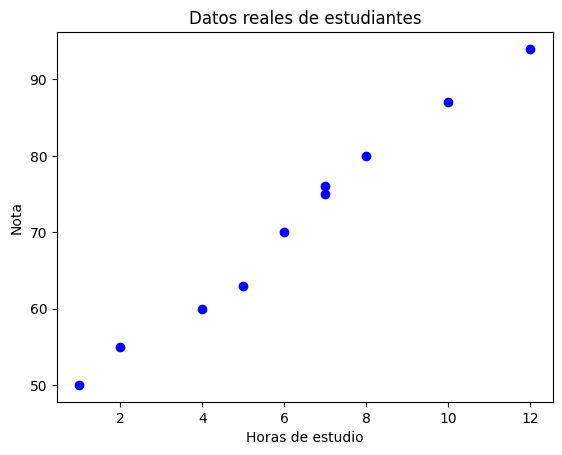

In [5]:
# Visualizar los datos
plt.scatter(df['horas_estudio'], df['nota'], color='blue')
plt.xlabel('Horas de estudio')
plt.ylabel('Nota')
plt.title('Datos reales de estudiantes')
plt.show()

In [9]:
# Entrenar el modelo
# Variable independiente (X)
X = df[['horas_estudio']]
# Variable dependiente (y)
y = df['nota']

# Modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Linea de prediccion
y_pred = modelo.predict(X)

y_pred # valor predicho

array([49.51737452, 53.64864865, 61.91119691, 66.04247104, 70.17374517,
       74.30501931, 74.30501931, 78.43629344, 86.6988417 , 94.96138996])

In [10]:
y.values # Valor real

array([50, 55, 60, 63, 70, 75, 76, 80, 87, 94])

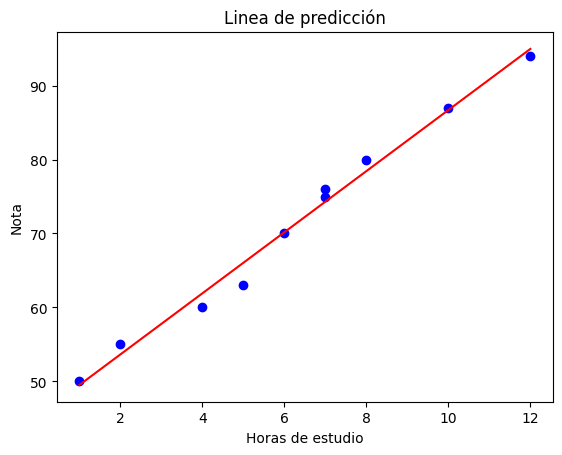

In [11]:
# Grafica
# Datos reales
plt.scatter(X, y, color='blue')
# datos predichos
plt.plot(X, y_pred, color ='red')
plt.xlabel('Horas de estudio')
plt.ylabel('Nota')
plt.title('Linea de predicción')
plt.show()

👉 Explica:

- Azul = datos reales.

- Rojo = línea que aprendió el modelo.

In [14]:
# Hacer una predicción
# ¿Que nota sacará un estudiante que estudia 7.5 horas?
horas = np.array([[7.5]])
prediccion = modelo.predict(horas)
print(f'Si estudias 7.5 horas, la predicción es: {prediccion[0]:.2f}')

Si estudias 7.5 horas, la predicción es: 76.37


C:\Users\leona\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

Error Absoluto Medio (MAE)

In [16]:
# Calcular el MAE
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Error Absoluto Medio: {mae}')
print(f"Coeficiente de Determinación: {r2}")

Error Absoluto Medio: 1.2177606177606193
Coeficiente de Determinación: 0.9878130325057699


In [17]:
print(f'{ 76.37 - 1.22} - { 76.37 + 1.22}')

75.15 - 77.59


In [20]:
f'{0.988 * 100}%'

'98.8%'

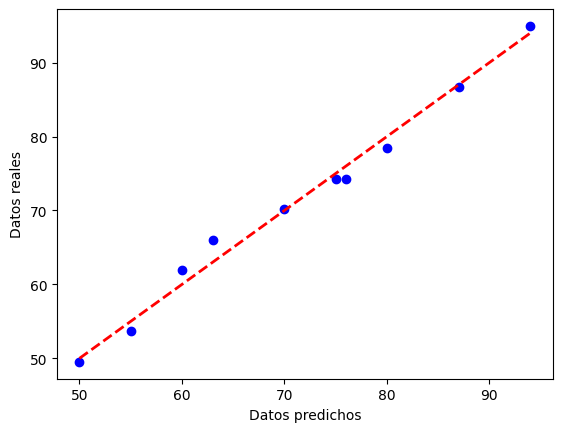

In [23]:
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', ls='--', lw=2)
plt.xlabel('Datos predichos')
plt.ylabel('Datos reales')
plt.show()